# A basic example of a full neural network
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_ml_ats/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_ml_ats/blob/main/code/ann_basic.ipynb)

Below is a simple example of how to code a neural network using keras tensor flow.

In [1]:
# Import tensorflow and keras
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, odr

from sklearn.model_selection import train_test_split

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12.0/2.5, 8.0/2.5)

# this is for running in colaboratory
# show plots inline
#%matplotlib inline    
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
# random numbers
get_ipython().run_line_magic('env', 'PYTHONHASHSEED=99')
# %env PYTHONHASHSEED=99
np.random.seed(99)
tf.random.set_seed(99)

env: PYTHONHASHSEED=99


In [3]:
import sys
print(f"python version = {sys.version}")
print(f"numpy version = {np.__version__}")

python version = 3.7.11 (default, Jul 27 2021, 07:03:16) 
[Clang 10.0.0 ]
numpy version = 1.21.5


## Linear regression example

In [4]:
url = 'https://github.com/chasinginfinity/ml-from-scratch/raw/master/02%20Linear%20Regression%20using%20Gradient%20Descent/data.csv'
data = pd.read_csv(url)
x = np.array(data.iloc[:, 0])
y = np.array(data.iloc[:, 1])
x = (x-np.mean(x))/np.std(x)
y = (y-np.mean(y))/np.std(y)


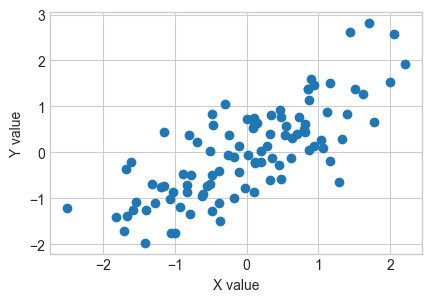

In [5]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

plt.scatter(x, y)
plt.xlabel('X value')
plt.ylabel('Y value')
plt.show()

In [6]:
# Example: build a simple, fully-connected network 
# (aka multi-layer perceptron).
# Nodes of each layer are connected to all nodes of the next layer.

# In Tensorflow/Keras a NN model is built in layers. 
# Most common type is sequential layers - one layer after the other with 
# connections only between neighboring layers.

# define the model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer=keras.optimizers.Adam(0.01),  # Adam optimizer
            loss='mse',                               # mean squared error
            metrics=['mae'])                          # mean absolute error

# Now train the model
# training input: x
# training output: y  
# Train on batches of 64 samples (chunk size).
# Epochs: run through all training data that many times. Order gets shuffled.

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = .2, shuffle=True, random_state = 12)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

history = model.fit(x_train, y_train, epochs=250, batch_size=64, verbose=0, validation_data=(x_val,y_val), shuffle=True)   
print('done training')

2022-02-18 14:36:39.859732: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(79, 1)
(79, 1)
(20, 1)
(20, 1)
done training


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


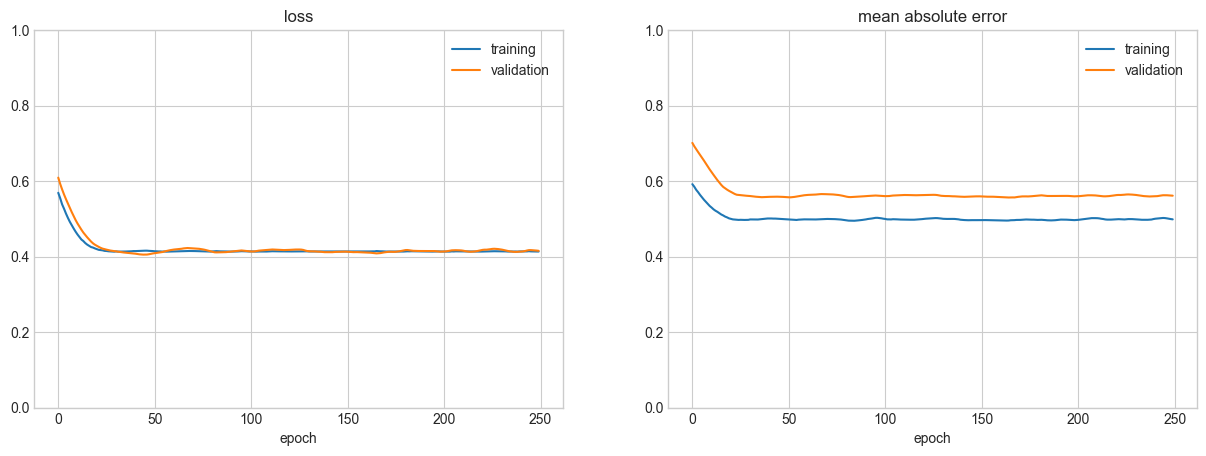

In [7]:
#from keras.callbacks import history 
print(history.history.keys())

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = 'training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.title('loss')
plt.xlabel('epoch')
plt.legend()
plt.ylim(0,1.)

plt.subplot(1,2,2)
plt.plot(history.history['mae'],label = 'training')
plt.plot(history.history['val_mae'], label = 'validation')
plt.title('mean absolute error')
plt.xlabel('epoch')
plt.legend()
plt.ylim(0,1.)

plt.show()

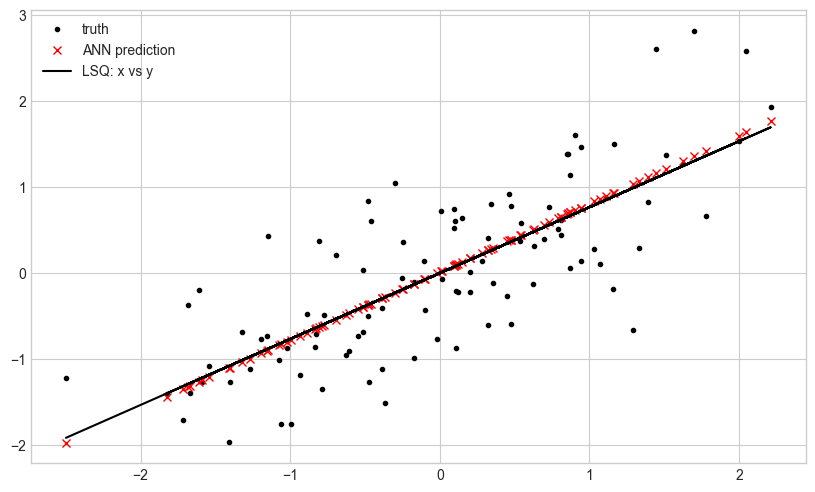

In [8]:
# output predictions based on input x
ypred = model.predict(x)

# plot predicted values
plt.figure(figsize=(10,6))
plt.plot(x, y, '.', color='black', label='truth')
plt.plot(x, ypred, 'x', color='red', label='ANN prediction')

slope, intercept, r_value, p_value, std_err = stats.linregress(np.squeeze(x),np.squeeze(y))
plt.plot(x,intercept+x*slope,'-',color = 'black', label = 'LSQ: x vs y')
plt.legend()

#plt.ylim(0,120)
#plt.xlim(0,120)

plt.show()

# A non-linear, more interesting example

In [9]:
# MODIFY: define a function to be estimated
def my_function(x):
    return np.round(np.sin(1.15*x * np.pi))
#     return np.abs(np.sin(x * np.pi/2))                   # uncomment for another interesting function to use
    #return np.sin(x * np.pi/2)                            # uncomment for another interesting function to use

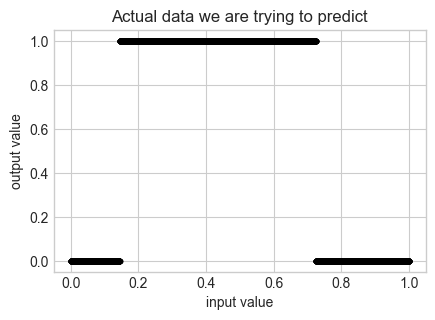

In [10]:
# make some "truth" data
# generate lots of sample pairs (x, f(x))

n_samples = 10000
x = np.random.random((n_samples,1))
y = my_function(x)  

# plot the (x,y) pairs.
plt.figure()
plt.plot(x, y, '.', color='black')
plt.title('Actual data we are trying to predict')
plt.xlabel('input value')
plt.ylabel('output value')
plt.show()

Activation Functions: https://www.tensorflow.org/api_docs/python/tf/keras/activations

Common choices include:
* relu
* sigmoid
* tanh

done training
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


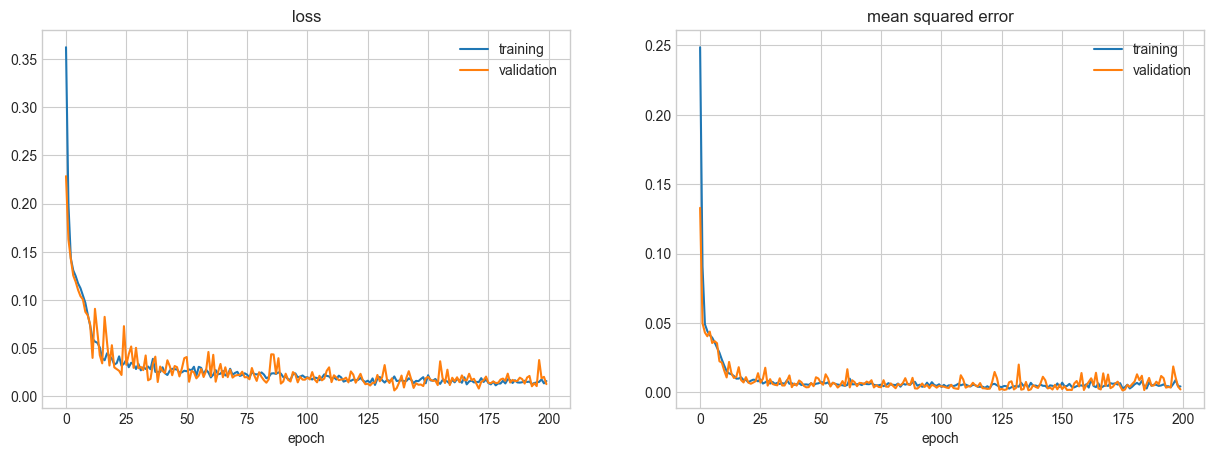

In [11]:
# Example: build a simple, fully-connected network 
# (aka multi-layer perceptron).
# Nodes of each layer are connected to all nodes of the next layer.

# In Keras a NN model is built in layers. 
# Most common type is sequential layers - one layer after the other with 
# connections only between neighboring layers.

# number of units in each layer
n_units = 16

# define the model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

# Input layer is defined later

# First hidden layer: densely-connected layer with n_units units and activation function 'relu'.
model.add(layers.Dense(n_units, activation='relu'))
#model.add(layers.Dense(1, activation='linear'))

# Second hidden layer:
model.add(layers.Dense(n_units, activation='relu'))

# final layer:  just 1 node and no activation function
model.add(layers.Dense(1,activation=None))

model.compile(optimizer=keras.optimizers.Adam(0.01),  # Adam optimizer
            loss='mae',                               # mean absolute error = mae
            metrics=['mse'])                          # mean squared error = mse

# Now train the model
# training input: x
# training output: y  
# Train on batches of 128 samples (chunk size).
# Epochs: run through all training data that many times. Order gets shuffled.
n_epochs = 200

history = model.fit(x, y, epochs=n_epochs, batch_size=128, verbose=0, validation_split=0.2, shuffle=True)
print('done training')

print(model.summary())

#-----------------------------------------
# plot the loss during training
#-----------------------------------------
#from keras.callbacks import history 
print(history.history.keys())

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = 'training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.title('loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mse'],label = 'training')
plt.plot(history.history['val_mse'], label = 'validation')
plt.title('mean squared error')
plt.xlabel('epoch')
plt.legend()

plt.show()

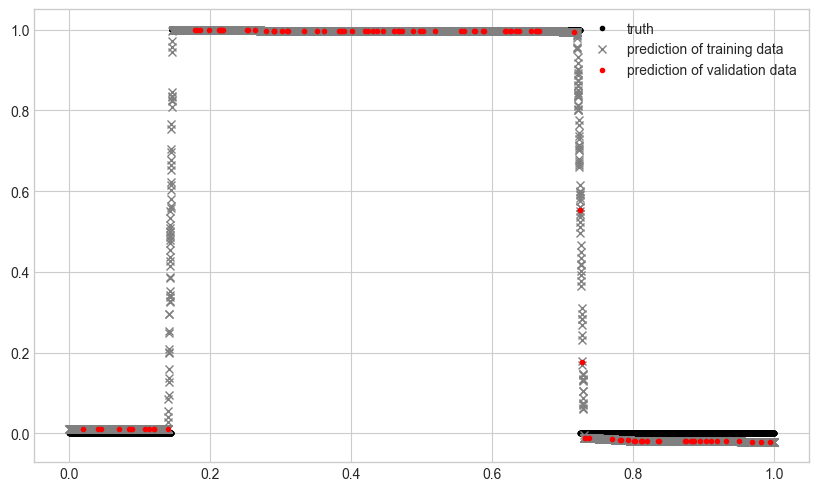

In [12]:
# make predictions with your model
ypred = model.predict(x)
# create new samples in x
px = np.random.random((100 ,1))
# predict y
py = model.predict(px)

# plot predicted values
plt.figure(figsize=(10,6))
plt.plot(x, y, '.', color='black', label='truth')
plt.plot(x, ypred, 'x', color='gray', label='prediction of training data')
plt.plot(px, py, '.', color='red', label='prediction of validation data')
plt.legend()

# Same example, but now with classification instead

In [13]:
y_class = np.asarray(np.round(y),dtype='int')
num_classes = len(np.unique(y_class))
print('classes = ' + str(np.unique(y_class)))

# number of units in each layer
n_units = 16

# define the model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

# Input layer is defined later

# First hidden layer: densely-connected layer with n_units units and activation function 'relu'.
model.add(layers.Dense(n_units, activation='relu'))
#model.add(layers.Dense(1, activation='linear'))

# Second hidden layer:
model.add(layers.Dense(n_units, activation='relu'))

# final layer:  just 1 node and no activation function
model.add(layers.Dense(num_classes,activation=None))

# normalize output to turn values into "likilihoods" that sum to 1.0
model.add(layers.Activation('softmax'))

model.compile(optimizer=keras.optimizers.Adam(0.01),  # Adam optimizer
            loss='sparse_categorical_crossentropy',       # mean absolute error = mae
            metrics=['accuracy'])  # mean squared error = mse

classes = [0 1]


done training
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 338
Trainable params: 338
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


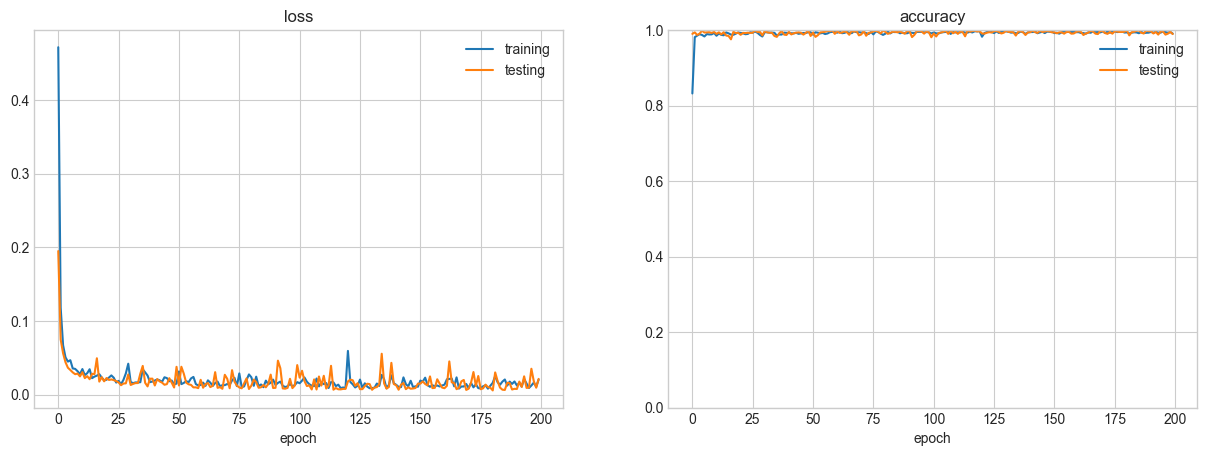

In [14]:
# Now train the model
# training input: x
# training output: y  
# Train on batches of 128 samples (chunk size).
# Epochs: run through all training data that many times. Order gets shuffled.
n_epochs   = 200
batch_size = 128

history = model.fit(x, y_class, epochs=n_epochs, batch_size=batch_size, verbose=0, validation_split=0.2, shuffle=True)   
print('done training')

print(model.summary())

#-----------------------------------------
# plot the loss during training
#-----------------------------------------
#from keras.callbacks import history 
print(history.history.keys())

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = 'training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.title('loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label = 'training')
plt.plot(history.history['val_accuracy'], label = 'testing')
plt.title('accuracy')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend()

plt.show()

In [15]:
# make predictions with your model
ypred_class = model.predict(x)         # predict the probability/likelihood of each class with your trained model
# ypred = np.argmax(ypred_class,axis=1)  # compute which class has the highest probability/likelihood


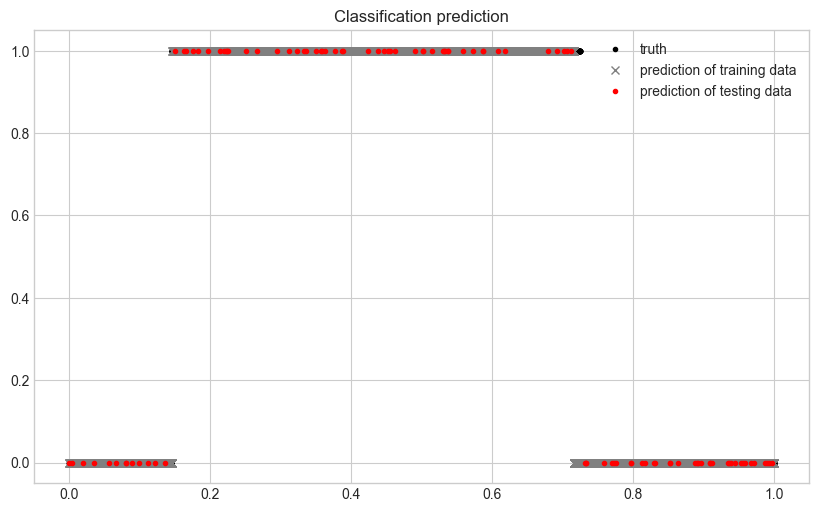

In [16]:
# make predictions with your model
ypred_class = model.predict(x)         # predict the probability/likelihood of each class with your trained model
ypred = np.argmax(ypred_class,axis=1)  # compute which class has the highest probability/likelihood

# create new samples in x
px = np.random.random((100 ,1))
# predict y
py_class = model.predict(px)
py = np.argmax(py_class,axis=1)

# plot predicted values
plt.figure(figsize=(10,6))
plt.plot(x, y, '.', color='black', label='truth')
plt.plot(x, ypred, 'x', color='gray', label='prediction of training data')
plt.plot(px, py, '.', color='red', label='prediction of testing data')
plt.legend()
plt.title('Classification prediction')
plt.show()

#### Let's look at one particular prediction output by the classifier ANN

In [17]:
print('prediction output shape = ' + str(ypred_class.shape))
sample = 44

print('-----------------------------------------')
print('Sample = ' + str(sample) + ', Prediction = ' + str(y_class[sample]))
print('Prediction Likelihood [0] = ' + str(ypred_class[sample][0]))
print('Prediction Likelihood [1] = ' + str(ypred_class[sample][1]))
print('-----------------------------------------')

prediction output shape = (10000, 2)
-----------------------------------------
Sample = 44, Prediction = [0]
Prediction Likelihood [0] = 1.0
Prediction Likelihood [1] = 1.8175733e-14
-----------------------------------------
